# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: __does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?__

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses.

For this project, I will be cleaning and exploring the data set in Jupyter notebook.

### Importing Data

In [2]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

There several rows where one or more columns (such as RespondentID) are null in value. So we will begin by removing the rows that contain null RespondentID value.

In [4]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [5]:
#Column Names
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

We can see that there is an ID column, some question columns with 'Yes', 'No' or Nan, and some Unnamed columns. We'll convert the Yes/No answers to the question columns to boolean (True/False).

In [6]:
#Mapping Yes/No to True/False
yes_no = {
    "Yes": True,
    "No": False
}

columns = ['Have you seen any of the 6 films in the Star Wars franchise?',
          'Do you consider yourself to be a fan of the Star Wars film franchise?']

for c in columns:
    star_wars[c] = star_wars[c].map(yes_no)

In [7]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


As expected, the Yes/No(s) have been converted to True/False.

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, __Which of the following Star Wars films have you seen? Please select all that apply.__

- __Which of the following Star Wars films have you seen? Please select all that apply.__ - Whether or not the respondent saw __Star Wars: Episode I The Phantom Menace__.
- __Unnamed: 4__ - Whether or not the respondent saw __Star Wars: Episode II Attack of the Clones__.
- __Unnamed: 5__ - Whether or not the respondent saw __Star Wars: Episode III Revenge of the Sith__.
- __Unnamed: 6__ - Whether or not the respondent saw __Star Wars: Episode IV A New Hope__.
- __Unnamed: 7__ - Whether or not the respondent saw __Star Wars: Episode V The Empire Strikes Back__.
- __Unnamed: 8__ - Whether or not the respondent saw __Star Wars: Episode VI Return of the Jedi__.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie.

To make it easier to work with, I will convert the response to each column to boolean.

In [8]:
import numpy as np

columns = star_wars.columns[3:9]
yes_no = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

name_map = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
}

for c in columns:
    star_wars[c] = star_wars[c].map(yes_no)

star_wars = star_wars.rename(columns=name_map)


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the columns can contain the value 1, 2, 3, 4, 5, 6, or NaN.

I will now convert the response to numeric.

In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
name_map = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6',
}

star_wars = star_wars.rename(columns=name_map)

### Mean ranking of each Star Wars episode

In [11]:
mean_rankings = star_wars[star_wars.columns[9:15]].mean()

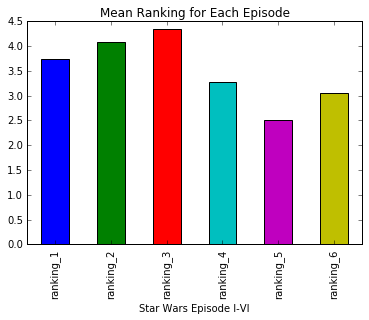

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

mean_rankings.plot.bar()
plt.xlabel("Star Wars Episode I-VI")
plt.title("Mean Ranking for Each Episode")

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.

### View count of each episode

In [16]:
sum_seen = star_wars[star_wars.columns[3:9]].sum()

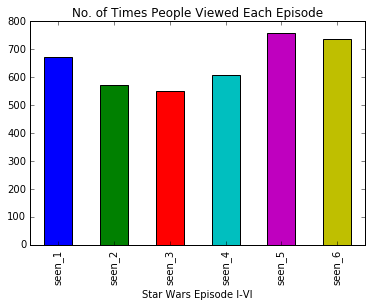

In [17]:
sum_seen.plot.bar()
plt.xlabel("Star Wars Episode I-VI")
plt.title("No. of Times People Viewed Each Episode")

It seems that view counts went down after the first episode but eventually started going up, following 'Star Wars: Episode III.' Since less mean rank is better, it confirms the hypotheses that more people enjoyed the original movies.

### Male/Female differences in Star Wars mean rankings

In [30]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

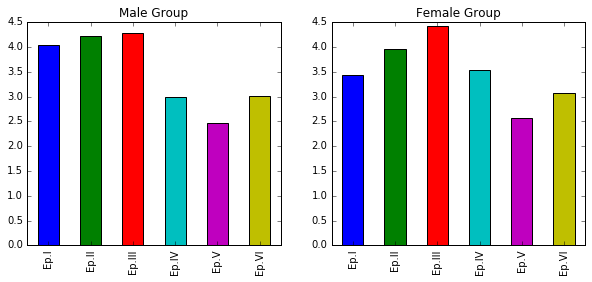

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

males[males.columns[9:15]].mean().plot.bar(ax=axes[0])
females[females.columns[9:15]].mean().plot.bar(ax=axes[1])
axes[0].set_xticklabels(['Ep.I','Ep.II','Ep.III','Ep.IV','Ep.V','Ep.VI'])
axes[1].set_xticklabels(['Ep.I','Ep.II','Ep.III','Ep.IV','Ep.V','Ep.VI'])
axes[0].set_title("Male Group")
axes[1].set_title("Female Group")

### Male/Female differences in Star Wars view counts

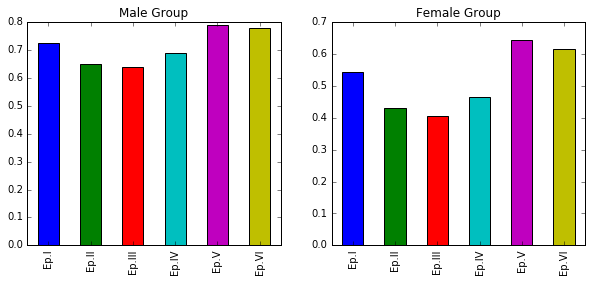

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

males[males.columns[3:9]].mean().plot.bar(ax=axes[0])
females[females.columns[3:9]].mean().plot.bar(ax=axes[1])
axes[0].set_xticklabels(['Ep.I','Ep.II','Ep.III','Ep.IV','Ep.V','Ep.VI'])
axes[1].set_xticklabels(['Ep.I','Ep.II','Ep.III','Ep.IV','Ep.V','Ep.VI'])
axes[0].set_title("Male Group")
axes[1].set_title("Female Group")

Looks like more males watched the first 3 movies but liked them far less than the female group.